## Get data

In [6]:
%load_ext autoreload
%autoreload 2
import os, sys


import pandas as pd
import numpy as np
import plotly
from preprocessing.data_processing import process_data, clean_data, cluster_rental_location, generate_features

import pandas as pd
from datetime import datetime
import plotly.graph_objects as go
import plotly.express as px
from sklearn.cluster import KMeans

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
pd.options.plotting.backend = "plotly"

DATA_DIR = './data'
train = os.path.join(DATA_DIR, 'train.csv')
test = os.path.join(DATA_DIR, 'test.csv')

train_final = os.path.join(DATA_DIR, 'train_with_mrt_mall_school_stock.csv')
test_final = os.path.join(DATA_DIR, 'train_with_mrt_mall_school_stock.csv')
train_final_df, test_final_df = pd.read_csv(train_final), pd.read_csv(test_final)
train_df, test_df = pd.read_csv(train), pd.read_csv(test)

train_df_cleaned, test_df_cleaned = clean_data(train_df), clean_data(test_df)
train_df_cleaned, test_df_cleaned = process_data(train_df_cleaned), process_data(test_df_cleaned, mode='test')
train_df_cleaned_final, test_df_cleaned_final = clean_data(train_final_df), clean_data(train_final_df)
train_df_cleaned_final, test_df_cleaned_final = process_data(train_df_cleaned_final), process_data(test_df_cleaned_final, mode='test')

train_df_cleaned, test_df_cleaned = generate_features(train_df_cleaned, test_df_cleaned)
train_df_cleaned_final, test_df_cleaned_final = generate_features(train_df_cleaned_final, test_df_cleaned_final)

## Hypothesis

From the observation from the price trend, we formulate the hypothesis based on the correlation at "rent_approval_date" level, this is because with the increasing trend, pure scatter plot might not be easy to capture the relation ship between features and price. We might consider correlation with unit price (price per square meter)

All correlation should be analysed given a time period (group by rent_approval_date), to eliminate the trending effect. 

1. age is correlated with unit price
2. distance with mrt

## MRT information

In [11]:
train_df_cleaned_final.groupby(['rent_approval_date', 'region'])[['psqm', 'near_mrt_count']].corr().iloc[0::2,-1].reset_index().plot.line(x='rent_approval_date', y='near_mrt_count', color='region', width=800, height=500)

KeyError: "Columns not found: 'near_mrt_count'"

In [12]:
train_df_cleaned_final.groupby(['rent_approval_date', 'region'])[['psqm', 'nearest_mrt_dist']].corr().iloc[0::2,-1].reset_index().plot.line(x='rent_approval_date', y='nearest_mrt_dist', color='region', width=800, height=500)

## Mall Information

In [ ]:
train_df_cleaned_final.groupby(['rent_approval_date', 'region'])[['psqm', 'near_mall_count']].corr().iloc[0::2,-1].reset_index().plot.line(x='rent_approval_date', y='near_mall_count', color='region', width=800, height=500)

In [ ]:
train_df_cleaned_final.groupby(['rent_approval_date', 'region'])[['psqm', 'nearest_mall_dist']].corr().iloc[0::2,-1].reset_index().plot.line(x='rent_approval_date', y='nearest_mall_dist', color='region', width=800, height=500)

## School information

In [ ]:
train_df_cleaned_final.groupby(['rent_approval_date', 'region'])[['psqm', 'near_school_count']].corr().iloc[0::2,-1].reset_index().plot.line(x='rent_approval_date', y='near_school_count', color='region', width=800, height=500)

In [ ]:
train_df_cleaned_final.groupby(['rent_approval_date', 'region'])[['psqm', 'nearest_school_dist']].corr().iloc[0::2,-1].reset_index().plot.line(x='rent_approval_date', y='nearest_school_dist', color='region', width=800, height=500)

## Age information

In [ ]:
train_df_cleaned_final.groupby(['rent_approval_date', 'region'])[['psqm', 'age']].corr().iloc[0::2,-1].reset_index().plot.line(x='rent_approval_date', y='age', color='region', width=800, height=500)

## Stock information

              monthly_rent  stock_price
monthly_rent      1.000000    -0.447339
stock_price      -0.447339     1.000000


Text(0.5, 0.98, 'Monthly Stock price vs. Monthly Rent price')

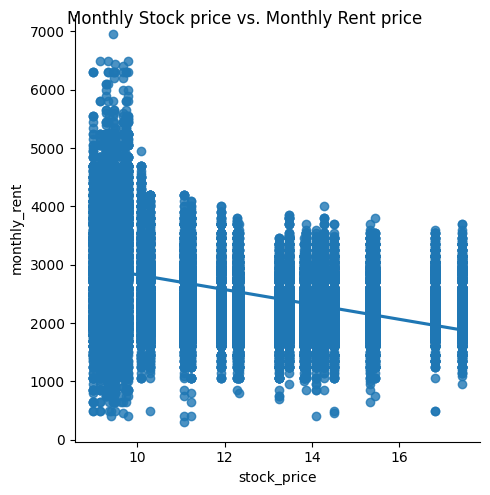

In [29]:
import seaborn as sns
#train_df_cleaned_final[["monthly_rent", "stock_price"]].corr().style.background_gradient(cmap='coolwarm')
cormat = train_df_cleaned_final[["monthly_rent", "stock_price"]].corr()
print(cormat)
sns.lmplot(x="stock_price", y="monthly_rent", data=train_df_cleaned_final).fig.suptitle("Monthly Stock price vs. Monthly Rent price")


## All Keys information

In [30]:
#print(train_df_cleaned_final.head(5))
train_df_cleaned_final[["monthly_rent", "stock_price","price","floor_area_sqm","psqm","near_mrt_count_2","near_mall_count_2","near_school_count_2"]].corr().style.background_gradient(cmap='coolwarm')

,monthly_rent,stock_price,price,floor_area_sqm,psqm,near_mrt_count_2,near_mall_count_2,near_school_count_2
monthly_rent,1.000000,-0.447339,0.523421,0.306466,0.592443,0.093121,0.066873,-0.022570
stock_price,-0.447339,1.000000,-0.829226,0.018852,-0.402033,-0.005723,0.003447,0.005096
price,0.523421,-0.829226,1.000000,-0.019974,0.469558,0.008384,0.002855,-0.002433
floor_area_sqm,0.306466,0.018852,-0.019974,1.000000,-0.540748,-0.211388,-0.034615,0.177376
psqm,0.592443,-0.402033,0.469558,-0.540748,1.000000,0.268216,0.099600,-0.181757
near_mrt_count_2,0.093121,-0.005723,0.008384,-0.211388,0.268216,1.000000,0.659899,-0.194202
near_mall_count_2,0.066873,0.003447,0.002855,-0.034615,0.099600,0.659899,1.000000,0.106042
near_school_count_2,-0.022570,0.005096,-0.002433,0.177376,-0.181757,-0.194202,0.106042,1.000000


## Summary - v1
From the analysis above, we are able to see that:

1. There is a clear inverse relationship between Stock and rental housing. When rental housing prices rise, stock prices fall. vice versa.